<a href="https://colab.research.google.com/github/AlejandroVillazonG/Tareas_MAT277/blob/main/T1_MAT277_2023_1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" width= 800 /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> MAT277 ANÁLISIS NUMÉRICO DE ECUACIONES EN DERIVADAS PARCIALES</h1>

<H3 align='center'> TAREA 1 - 2023-1  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Alejandro Villazón G. </H3>
<hr style="height:2px;border:none"/>



# Ejercicio asignado: 3

Sea $\Omega=(0,1)$ y $\mathcal{T}=\left\{K_1, \ldots, K_N\right\}$ una partición con $K_j=\left(x_j, x_{j+1}\right), x_j=(j-1) h, h=\frac{1}{N}$. Se define el espacio de elementos finitos de orden 2 por
$$
\mathcal{S}_0^2(\mathcal{T})=\left\{u \in H^1(\Omega)~|~u|_{K_j} \in \mathbb{P}_2, \text { y } u(0)=u(1)=0\right\}
$$
Sea $\left\{\varphi_2, \ldots, \varphi_{N}\right\}$ una base de funciones techo de $\mathcal{S}_0^1(\mathcal{T})$. Entonces, una base de $\mathcal{S}_0^2(\mathcal{T})$ es
$$
\left\{\varphi_2, \ldots, \varphi_{N}, \psi_1, \ldots, \psi_N\right\}
$$
donde
$$
\psi_j(x)= \begin{cases}\left(x-x_j\right)\left(x_{j+1}-x\right) & x \in K_j, \\ 0 & x \notin K_j\end{cases}
$$
Considere la formulación variacional del problema
$$
-u^{\prime \prime}(x)=1, \quad x \in(0,1), \quad u(0)=u(1)=0 .
$$
e implemente un código computacional en Python para calcular la aproximación de elementos finitos $u_h \in \mathcal{S}_0^2(\mathcal{T})$. Estudie el error de aproximación que se obtiene considerando $N=2^n$, con $n \in\{1, \ldots, 12\}$. ¿Que orden de convergencia puede observar?

## Solución:

Primero recordemos que la base de funciones techo de $S_0^1(\mathcal{T})$ están definidas como:
$$
\varphi_j(x)= 
\begin{cases}
  \frac{x-x_{j-1}}{x_j-x_{j-1}} & x \in K_{j-1}, \\
  \frac{x_{j+1}-x}{x_{j+1}-x_j} & x \in K_j, \\
  0 & \text{e.o.c}
\end{cases}
$$
y del laboratorio sabemos que cumplen:
*   $\int_0^1 \varphi_{j}(x)\,\mathrm{d}x = \frac{\text{base}\cdot\text{altura}}{2} = \frac{2h\cdot 1}{2} = h$
*   $\int_0^1 \varphi_i'(x)\varphi_j'(x)\,\mathrm{d}x = 0 \quad \text{si}\quad |i-j|>1$ 
*   $\int_0^1 \varphi_{j-1}'(x)\varphi_j'(x)\,\mathrm{d}x = -\frac{1}{h}$
*   $\int_0^1 \varphi_{j}'(x)\varphi_j'(x)\,\mathrm{d}x = \frac{2}{h}$
*   $\int_0^1 \varphi_{j}'(x)\varphi_{j+1}'(x)\,\mathrm{d}x = -\frac{1}{h}$



Note que la formulación variacional del problema es encontrar $u\in H_0^1(\Omega)$ tal que:

$$\int_0^1 u'(x)v'(x)\,\mathrm{d}x =\int_0^1 u'(x)v'(x)\,\mathrm{d}x - u'(x)v(x) \bigg|_0^1= \int_0^1 -u''(x)v(x)\,\mathrm{d}x = \int_0^1 v(x)\,\mathrm{d}x\quad \forall v\in H_0^1(\Omega)$$

Considerando el espacio discreto $S_0^2(\mathcal{T})$ podemos escribir $$u_h = \sum_{i=1}^{N-1} U_i \varphi_{i+1} + \sum_{i=1}^{N} W_i \psi_{i}$$ 
con $U_0 = U_{N} = 0$ donde $U = [U_1,\ldots,U_{N-1}]^\top\in\mathbb{R}^{N-1}$, $W=[W_1,\ldots,W_N]^\top \in \mathbb{R}^N$ tenemos que el problema es hallar $u_h$ tal que 

$$\int_0^1 u_h'(x)\varphi_{j+1}'(x)\,\mathrm{d}x = \int_0^1 \varphi_{j+1}(x)\,\mathrm{d}x\quad \forall j = 1,\ldots,N-1$$

$$\int_0^1 u_h'(x)\psi_j'(x)\,\mathrm{d}x = \int_0^1 \psi_j(x)\,\mathrm{d}x\quad \forall j = 1,\ldots,N$$



Note que

*   $\int_0^1 \psi_j(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}} (x-x_j)(x_{j+1}-x)\,\mathrm{d}x = \int_0^h z(h-z)\,\mathrm{d}z = h\frac{h^2}{2}-\frac{h^3}{3} = \frac{h^3}{6}$

Además, dado que el soporte de $\psi_j$ es $K_j$ tenemos que:

* $\int_0^1 \psi_k'(x)\psi_j'(x)\,\mathrm{d}x = 0$ para todo $k\neq j$.
* $\int_0^1 \psi_j'(x)\psi_j'(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}} [(x_{j+1}-x)-(x-x_j)]^2\,\mathrm{d}x = \int_0^h [(h-z)-z]^2\,\mathrm{d}z = h^2h-4h\frac{h^2}{2}+4\frac{h^3}{3} = \frac{h^3}{3}$
* $\int_0^1 \varphi_k'(x)\psi_j'(x)\,\mathrm{d}x = 0$ para todo $k\neq j,j+1$.
* $\int_0^1 \varphi_j'(x)\psi_j'(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}}\frac{-1}{x_{j+1}-x_{j}} [(x_{j+1}-x)-(x-x_j)] \,\mathrm{d}x = -\frac{1}{h}\int_0^h [(h-z)-z]\,\mathrm{d}z = -\frac{1}{h} \left[ hh-h^2 \right] = 0$
* $\int_0^1 \varphi_{j+1}'(x)\psi_j'(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}}\frac{1}{x_{j+1}-x_{j}} [(x_{j+1}-x)-(x-x_j)] \,\mathrm{d}x = \frac{1}{h} \int_0^h [(h-z)-z]\,\mathrm{d}z = \frac{1}{h} \left[ hh-h^2 \right] = 0$

De donde concluimos que en realidad, $\int_0^1 \varphi_k'(x)\psi_j'(x)\,\mathrm{d}x = 0$ para todo $k,j$. 


Por lo tanto, nos queda el sistema de ecuaciones puede ser escrito como:



\begin{array}{ccc}
\begin{bmatrix}
\mathbf{A_1} & 0 \\
0 & \mathbf{A_2} \\
\end{bmatrix} &
\begin{bmatrix}
U \\
W \\
\end{bmatrix} &
=
\begin{bmatrix}
B_{1} \\
B_{2} \\
\end{bmatrix} \\
\end{array}

donde 

$$\mathbf{A_1}=\frac{1}{h}\left(\begin{array}{ccccc}2 & -1 & 0 & \cdots & 0 \\ -1 & 2 & -1 & \cdots & 0 \\ \vdots & \ddots & \ddots & \ddots & \vdots \\ 0 & \cdots & -1 & 2 & -1 \\ 0 & \cdots & 0 & -1 & 2\end{array}\right)_{(N-1) \times (N-1)} \qquad \mathbf{A_2} = \frac{h^3}{3} \mathbf{I}_{N\times N}, \qquad B_1 = h\mathbf{1}_{N-1}, \qquad B_2 = \frac{h^3}{6}\mathbf{1}_{N}$$


Notamos que el sistema es desacoplado, por lo que resolveremos los sistemas:
$$\mathbf{A_1} U = B_1$$
$$\mathbf{A_2} W = B_2$$




## Implementación:


Importamos las librerías necesarias:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Definimos las funciones de la base de $S_0^2(\mathcal{T})$:

In [3]:
def varphi_j(x,j,nodos):
  # El índice j debe estar entre 2 y N.
  x_jmenos1 = nodos[j-2] 
  x_j = nodos[j-1] 
  x_jmas1 = nodos[j]
  if (x_jmenos1 <= x) and (x <= x_j):
    return (x-x_jmenos1) / (x_j - x_jmenos1)
  elif (x_j <= x) and (x <= x_jmas1):
    return (x_jmas1-x) / (x_jmas1 - x_j)
  else:
    return 0

def psi_j(x,j,nodos):
  # El índice j debe estar entre 1 y N.
  x_j = nodos[j-1] 
  x_jmas1 = nodos[j]
  if (x_j <= x) and (x <= x_jmas1):
    return (x - x_j) * (x_jmas1-x)
  else:
    return 0

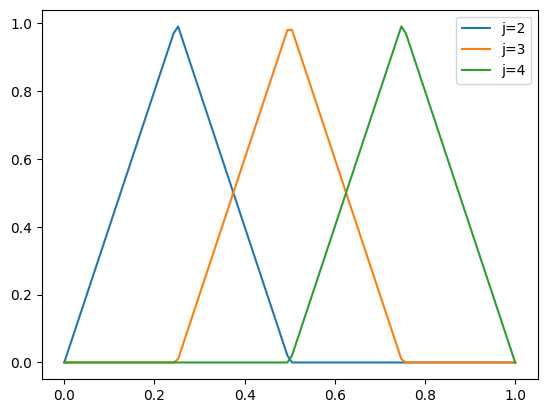

In [4]:
# ejemplo para \varphi_j
N = 4
nodos = np.linspace(0,1,N+1)
x = np.linspace(0,1,100)

for j in range(2,N+1):  
  plt.plot(x,[varphi_j(xx,j,nodos) for xx in x],
           label = f"{j=}")
plt.legend()
plt.show()

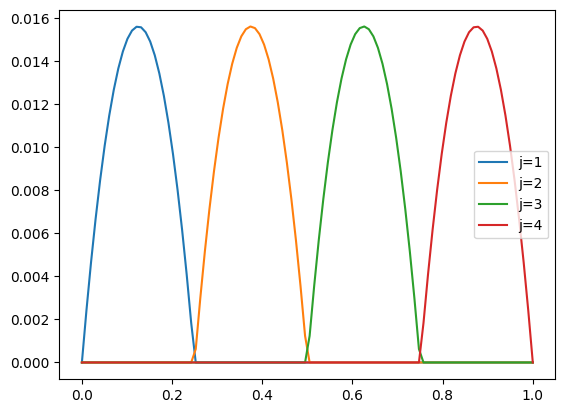

In [5]:
# ejemplo para psi_j
for j in range(1,N+1):
  plt.plot(x,[psi_j(xx,j,nodos) for xx in x],
           label = f"{j=}")
plt.legend();

Definimos las matrices y los vectores involucrados en el sistema lineal:

In [6]:
def A_1(N):
  M = np.zeros((N-1,N-1))  
  for k in range(N-2):
    M[k,k] = 2 * N
    M[k,k+1] = -N
    M[k+1,k] = -N
  M[N-2,N-2] = 2 * N
  return M

A_2 = lambda N: 1/(3 * N**3) * np.identity(N) 

B_1 = lambda N: (1/N) * np.ones(N-1) 

B_2 = lambda N: 1/(6 * N**3) * np.ones(N) 

Definimos la aproximación de elementos finitos $u_h$,

In [7]:
def u_h(x, nodos, U, W):
  N = nodos.size - 1
  uhx = 0
  for i in range(1,N):
    uhx += U[i-1] * varphi_j(x,i+1,nodos)
  for i in range(1,N+1):
    uhx += W[i-1] * psi_j(x,i,nodos)
  return uhx

Notemos que la solución de la EDO: 
$$
-u^{\prime \prime}(x)=1, \quad x \in(0,1), \quad u(0)=u(1)=0 .
$$
es: $$u(x) = \frac{1}{2}x(1-x)$$

In [8]:
u = lambda x: (1/2)*(1-x)*x

## Error en norma $H_0^1(\Omega)$

Definamos $a(u,v) := \int_\Omega u'(x)v'(x)\,\mathrm{d}x$, notamos que por la formulación variacional de nuestro problema: 
$$a(u,v) = \int_\Omega v(x)\,\mathrm{d}x,~ \forall v\in H_0^1(\Omega),$$
$$a(u_h,v_h) = \int_\Omega v_h(x)\,\mathrm{d}x,~ \forall v_h\in S_0^2(\mathcal{T}).$$ 
Por la ortogonalidad de Galerkin tenemos que $a(u-u_h,u_h)=0$ y por ende,

$$\begin{align*}
a(u-u_h,u-u_h) &= a(u-u_h,u) \\
&= a(u,u)-a(u,u_h) \\
&= a(u,u)-a(u,u_h) + a(u_h,u_h)-a(u_h,u_h) \\
&= a(u,u)-a(u-u_h,u_h)-a(u_h,u_h) \\
&= a(u,u) - a(u_h,u_h) \\
&= \|u'\|_{L^2(\Omega)}^2 - \|u_h'\|_{L^2(\Omega)}^2
\end{align*}$$

Por lo tanto, 
$$\|(u-u_h)'\|_{L^2(\Omega)}^2 = \left| \|u'\|_{L^2(\Omega)}^2 - \|u_h'\|_{L^2(\Omega)}^2 \right|$$

Como $u(x)=\frac{1}{2}x(1-x)$, entonces $u'(x)=\frac{1}{2}-x$, luego
$$ \|u'\|_{L^2(\Omega)}^2  = \int_0^1 \left(\frac{1}{2}-x\right)^2\,\mathrm{d}x = \int_{0}^\frac{1}{2} 2z^2\,\mathrm{d}z = \frac{2}{3}\left(\frac{1}{2}\right)^3 = \frac{1}{12}$$
Por otro lado, como 
$$u_h = \sum_{i=1}^{N-1} U_i \varphi_{i+1} + \sum_{i=1}^{N} W_i \psi_{i}$$ 
con $U_0=U_{N}=0$ tenemos que

\begin{align*}
u_h'|_{K_j}(x) &= \sum_{i=1}^{N-1} U_i \varphi_{i+1}'|_{K_j} + \sum_{i=1}^{N} W_i \psi_{i}'|_{K_j} \\
&= U_{j-1} \varphi_{j}'|_{K_j} + U_j \varphi_{j+1}'|_{K_j} + W_j \psi_{j}'|_{K_j}\\
&= \frac{1}{h}(U_j-U_{j-1})  + W_j [(x_{j+1}-x)-(x-x_j)]
\end{align*}

Luego,

\begin{align*}
\|u_h'\|_{L^2(K_j)}^2 &= \int_{x_j}^{x_{j+1}} \left(\frac{1}{h}(U_j-U_{j-1})  + W_j [(x_{j+1}-x)-(x-x_j)]\right)^2\,\mathrm{d}x \\
&= \int_0^h \left(\frac{1}{h}(U_j-U_{j-1})  + W_j [h-2z]\right)^2\,\mathrm{d}z \\
&= \int_{\frac{1}{h}(U_j-U_{j-1})+hW_j}^{\frac{1}{h}(U_j-U_{j-1})-hW_j} \frac{1}{-2W_j}x^2\,\mathrm{d}x \\ 
&= \frac{1}{6W_j}\left(\left[\frac{1}{h}(U_j-U_{j-1})+hW_j\right]^3-\left[\frac{1}{h}(U_j-U_{j-1})-hW_j\right]^3\right) \\
&= \frac{1}{6W_j} 2hW_j \left(\frac{3}{h^2}(U_j-U_{j-1})^2 + h^2W_j^2\right) \\
&= \frac{1}{h}(U_j-U_{j-1})^2 + \frac{h^3W_j^2}{3}
\end{align*}
Por lo tanto,

\begin{align*}
\|u_h'\|_{L^2(\Omega)}^2 &= \sum_{j=1}^N \|u_h'\|_{L^2(K_j)}^2 \\
&= \sum_{j=1}^N \frac{1}{h}(U_j-U_{j-1})^2 + \frac{h^3W_j^2}{3}
\end{align*}

A continuación se implementa este error:

In [9]:
def error(U,W):
  N = W.size
  return abs(1/12 - np.sum(N*np.diff(np.concatenate(([0],U,[0])))**2 + (1/(3*N**3))*W**2))

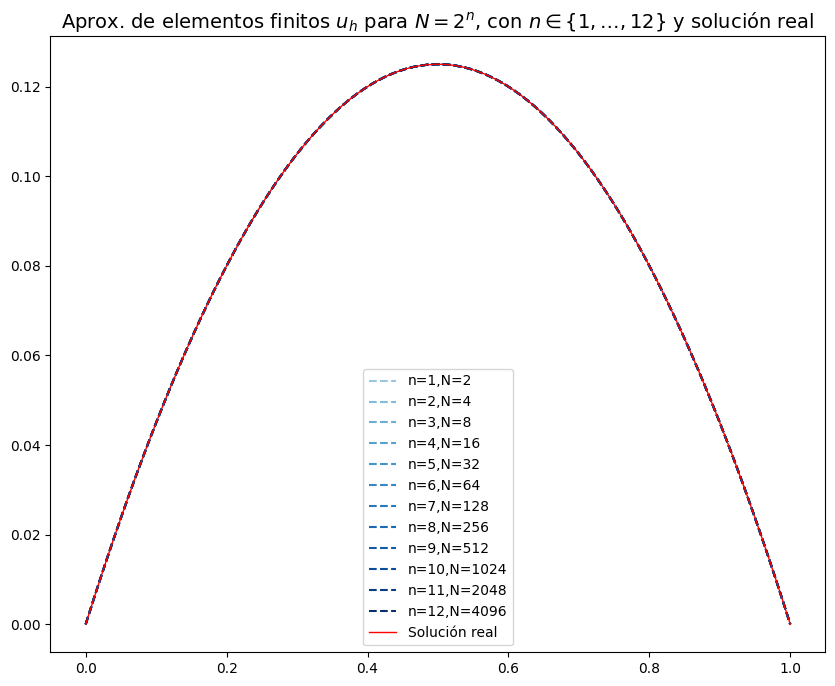

In [10]:
x = np.linspace(0,1,100)
ux = u(x)

plt.figure(figsize = (10,8))
colormap = plt.cm.Blues 

errores = []

for n in range(1,13):
  N = 2**n
  nodos = np.linspace(0,1,N+1)
  U = np.linalg.solve(A_1(N), B_1(N))
  W = np.linalg.solve(A_2(N), B_2(N))
  u_hx = [u_h(xx, nodos, U, W) for xx in x]
  errores.append(error(U,W))
  plt.plot(x,
           u_hx,
           '--', 
           label = f"{n=},{N=}",
           color = colormap((n+6)/18))

plt.plot(x,
         ux,
         linewidth = 1,
         label='Solución real',
         color = 'red')

plt.legend()
plt.title(r'Aprox. de elementos finitos $u_h$ para $N=2^n$, con $n \in\{1, \ldots, 12\}$ y solución real',
          fontsize = 14)
plt.show()

Podemos observar a simple vista que la aproximación de elementos finitos se ajusta bien desde $N=2$. Grafiquemos los errores:

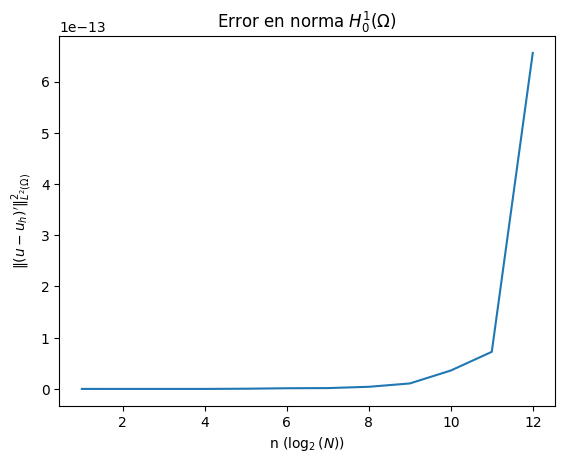

In [11]:
plt.plot(range(1,13), errores)
plt.xlabel(r'n ($\log_2(N)$)')
plt.ylabel(r'$\|(u-u_h)^\prime\|_{L^2(\Omega)}^2$')
plt.title(r'Error en norma $H_0^1(\Omega)$')
plt.show()

Note que $u$ es un polinomio de grado 2, por lo tanto, $u\in S_0^2(\mathcal{T})$, entonces es de esperar que el error sea cero. Lo cual se puede observar en el gráfico hasta $n=8$, errores de máquina (punto flotante) explican porque despues de cierto valor el error no es exactamente 0, pero aun así es del orden de $10^{-13}$ lo cual podemos considerar 0. 